# Birthweight Prediction Model - Linear Regression

Built a predictive model on a continuous response variable to determine the explanatory variables that could predict the dependent variable, birthweight

 

##### Dataset Dictionary 
The dataset consist of 17 variables, and 196 observations

- mage: mothers age
- meduc: education in years
- monpre: month prenatal care began
- npvis: total number of prenatal visits
- fage: father's age in years
- feduc: father's educ in years
- omaps: one minute apgar score, after event horizon 
- fmaps: five minute apgar score, after event horizon
- cigs: ag cigarettes per day
- drink: avg drinks per weeks
- male: 1 if a baby male
- mwhte: 1 if mother white
- mblck: 1 if mother black
- moth: 1 if mother is other
- fwhte: 1 if father white
- fblck: 1 if father is black
- foth: if father is other
- bwght: birthweight, grams

In [134]:
#importing necessary library
import pandas as pd
import numpy as np # 
import matplotlib.pyplot as plt #vizualization package
import seaborn as sns #vizualization package
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model # linear models

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = './birthweight_low.xlsx'

# reading the file into Python
birthweight = pd.read_excel(file)

# outputting the first ten rows of the dataset
birthweight.head(n= 10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


## Data Quality Analyis 

In [135]:
######  Analyzing dataframe quality
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


Dataset if made up of 196 observation and 17 variables.Variables meduc, npvis and feduc contain missing values. At the same time we have three variables with a float data type. First, apply descriptive statistics to understand the data to gather additional insights on the data quality, and how to deal with the missing values.

#### Missing Values

In [136]:
birthweight.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

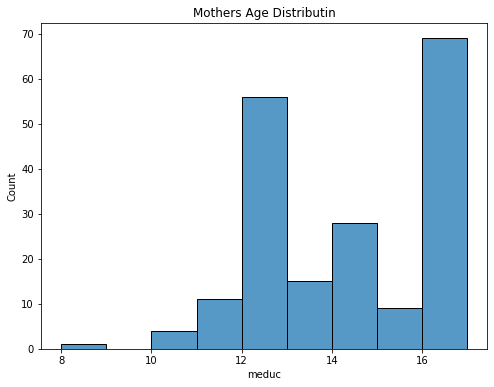

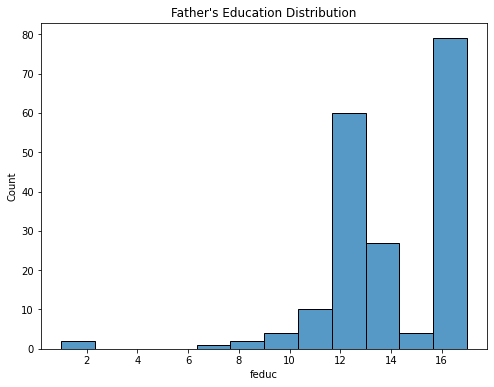

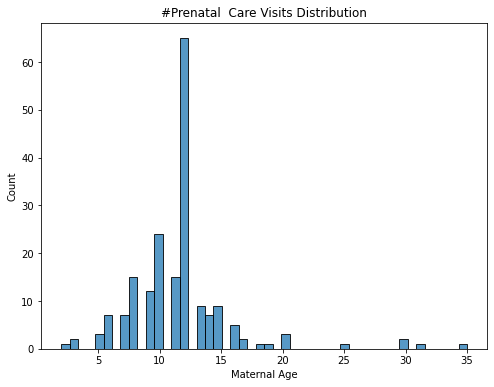

In [137]:
#Histogram to undestand the distibution of variables with missing values
#Mothers Age Distributin
fig, ax = plt.subplots(figsize = (8, 6))
plt.title("Mothers Age Distributin")
plt.show(sns.histplot(data=birthweight, x= 'meduc'))
plt.show()

#Fathers education distribution
fig, ax = plt.subplots(figsize = (8, 6))
plt.title("Father's Education Distribution")
plt.show(sns.histplot(data=birthweight, x= 'feduc'))
plt.show()


#Prenatal  Care Visits Distribution
fig, ax = plt.subplots(figsize = (8, 6))
plt.title("#Prenatal  Care Visits Distribution")
plt.xlabel('Maternal Age')
plt.show(sns.histplot(data=birthweight, x= 'npvis'))
plt.show()

For mother's education (meduc) the data is slightly skeweed to the left - as shown on the histogram below "Mothers Age Distribution", therefore median is a better representative of mother's education. 

For fathers education (feduc) , the mean is pulled by extreme high values, therefore the median is a better representative of the data

For the number of prenatal visist (npvis), the mean seems to be pulled by extreme low values. This is show on the histogram below "Prenatal  Care Visits Distribution", where the data is skeweed to the left.  At the same time the median and the third quartile are the same. Where the media says that approximatly 50% of mothers have a 12 year prenatal care visist during their pregnacy and due to the skweenes approximately 75% of mothers  also fall on 12 prenatal care visits during their pregnacy. 
    
These findings aling with what is expected on the real world. Mothers typically have seven to 12 prenatal visits over the course of a normal pregnancy (Price, 2015). Therefore the median is a better representative of npvis.


In [138]:
# creating columns with 1s if missing and 0 if not
for colums in birthweight:

    # creating columns with 1s if missing and 0 if not
    if birthweight[colums].isnull().sum() > 0:
        birthweight['m_'+colums] = birthweight[colums].isnull().astype(int)

# summing the missing value flags to check the results of the loop above
print(birthweight[    ['m_meduc', 'm_npvis',
             'm_feduc']    ].sum(axis = 0).astype(int))

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int32


In [139]:
#checking percentage of missing values to total datatset to determine relevance
birthweight['mv_sum']= birthweight['m_meduc'] + \
                     birthweight['m_npvis'] + \
                     birthweight['m_feduc']
                    
print(f"""

Number of Missing Values per Observation (Pct)
----------------------------------------------
{(birthweight['mv_sum'].value_counts(normalize = True,
                                sort = True,
                                ascending = True)*100).round(0)}
""")




Number of Missing Values per Observation (Pct)
----------------------------------------------
2     2.0
1     4.0
0    95.0
Name: mv_sum, dtype: float64



In totality 6% of data has missing values.Where 2% of the data has observations with 2 missing values while 4% percent of the data has observations with a least 1 missing value.


###### Filling Missing Values

In [140]:
#defining the median foe meduc, feduc, npvis
meduc_median = birthweight['meduc'].median()
feduc_median = birthweight['feduc'].median()
npvis_median  = birthweight['npvis'].median()

# filling medu, feduc and npvis missing values with the MEDIAN
birthweight['meduc'].fillna(value = meduc_median,
                         inplace = True)
birthweight['feduc'].fillna(value = feduc_median,
                         inplace = True)
birthweight['npvis'].fillna(value = npvis_median,
                            inplace = True)
# checking to make sure NAs are filled in
print(f"""
{'_' * 40}

Any missing values for mother, father & npvis?
{'_' * 40}

{birthweight['meduc'].isnull().any()}
{birthweight['feduc'].isnull().any()}
{birthweight['npvis'].isnull().any()}
""")


________________________________________

Any missing values for mother, father & npvis?
________________________________________

False
False
False



###### Converting Data Types

In [141]:
#converting floats to interger
birthweight ['meduc'] = birthweight ['meduc'].astype(int)
birthweight ['npvis'] = birthweight ['npvis'].astype(int)
birthweight ['feduc'] = birthweight ['feduc'].astype(int)
#checking results
birthweight.head(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc,mv_sum
0,69,14,5,2,62,14,4,7,23,9,1,0,1,0,0,1,0,697,1,0,1,2
1,68,12,3,10,61,11,4,6,25,11,1,1,0,0,1,0,0,1290,0,0,0,0
2,71,12,3,6,46,12,2,7,21,12,1,0,1,0,0,1,0,1490,0,0,0,0
3,59,16,1,8,48,16,7,8,21,10,0,0,0,1,0,0,1,1720,0,0,0,0
4,48,12,4,6,39,12,2,9,17,13,0,1,0,0,1,0,0,1956,0,0,0,0


#### Descriptive Statistics

In [142]:
birthweight.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc,mv_sum
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,40.153061,13.913265,2.341837,11.607143,39.290816,13.852041,8.193878,8.964286,10.928571,5.397959,0.551020,0.270408,0.382653,0.346939,0.346939,0.341837,0.311224,3334.086735,0.015306,0.015306,0.035714,0.066327
std,10.250055,2.040017,1.355136,4.234625,8.982725,2.586661,1.576482,0.651428,6.101282,3.001674,0.498664,0.445308,0.487279,0.477215,0.477215,0.475540,0.464180,646.700904,0.123082,0.123082,0.186052,0.304982
min,23.000000,8.000000,1.000000,2.000000,23.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,12.000000,2.000000,10.000000,34.750000,12.000000,8.000000,9.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2916.250000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,14.000000,2.000000,12.000000,38.000000,14.000000,9.000000,9.000000,11.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3452.000000,0.000000,0.000000,0.000000,0.000000
75%,46.000000,16.000000,3.000000,12.000000,43.000000,16.000000,9.000000,9.000000,15.250000,7.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3759.500000,0.000000,0.000000,0.000000,0.000000
max,71.000000,17.000000,8.000000,35.000000,73.000000,17.000000,10.000000,10.000000,25.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000,1.000000,1.000000,1.000000,2.000000


## Exploratory and Decriptive Analysis

##### Birthweight Variable

Birthweight ranges from 679 grams and 4933 grams, with a average weight of 3.3 grams.  Let's take a look at birthweight distribution. 

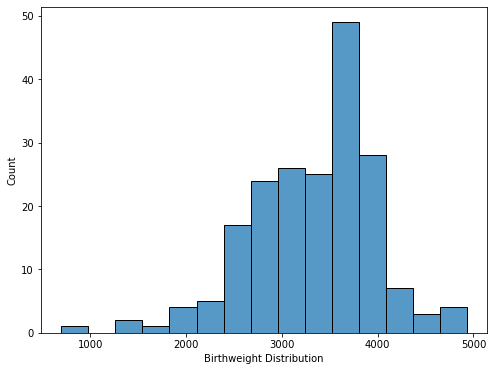

In [143]:
#redering histogram for birthweight
fig, ax = plt.subplots(figsize =(8,6))
plt.xlabel('Birthweight Distribution')
plt.show(sns.histplot(data= birthweight, x ='bwght'))

The distrinbution is positively skewed where there are large value pulling the distribution, the median 3452 grams better represents the data.  Generaly, newborns healthy weight ranges from 2500 and 4000 grams, our median falls within that range showing that our data points mostly represent newborns with a healthy birthweight.

##### Gender

Analysing the relationship between gender and birthweight.

In [144]:
# printing columns percetages
print(f"""
Baby is Male
------                  
{birthweight['male'].value_counts()}  

Baby is Male %
-----------
{round(birthweight['male'].value_counts()/len(birthweight)*100,0)}
""")


Baby is Male
------                  
1    108
0     88
Name: male, dtype: int64  

Baby is Male %
-----------
1    55.0
0    45.0
Name: male, dtype: float64



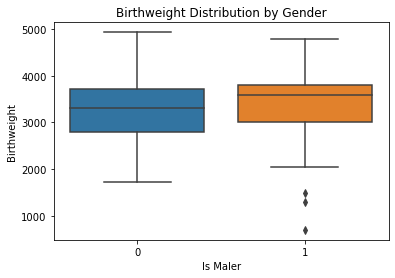

In [145]:
#rendereing plot for male
sns.boxplot(data=birthweight, x = 'male', y = 'bwght')
# title and axis labels 
plt.title(label   = "Birthweight Distribution by Gender")
plt.xlabel(xlabel = "Is Maler") 
plt.ylabel(ylabel = "Birthweight")
plt.show()

Boxlot shows male newborns have slightly higher birthweight, however more data needs to be collected to understand the relationship between this two variables.

###### After Event Horizon: omaps and fmaps

One and Five Minute apgar Score (omps and fmaps) is a measurements doctors uses to evaluste the health of newborns 1 to 5 minutes after birth, with score range of 0 to 2 for the following signs: activity, pulse, grimance, appearance, and repiration. In summation, a 7 to 10 score indicates the newborn is in good health. Where is where scores are base on activity, pulse, grimance, appearance, and repiration. omaps and fmaps , happen after the event horizon, therefore, it won't be include in the in the predictive model. However lets look how its distribution and  correlation to birthweight


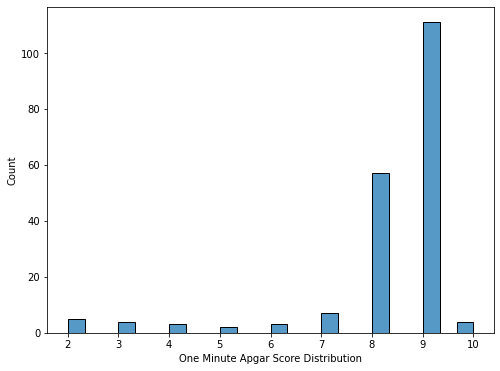

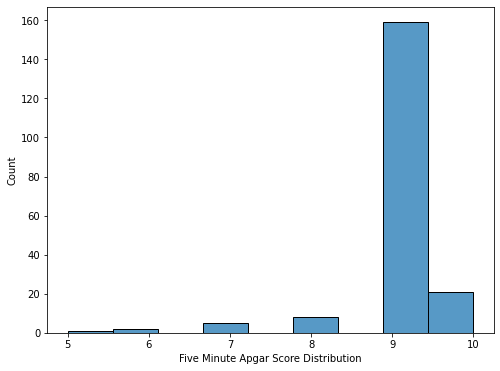

In [146]:
#redering histogram for omaps and fmaps
fig, ax = plt.subplots(figsize =(8,6))
plt.xlabel('One Minute Apgar Score Distribution')
plt.show(sns.histplot(data= birthweight, x = 'omaps'))

fig, ax = plt.subplots(figsize =(8,6))
plt.xlabel('Five Minute Apgar Score Distribution')
plt.show(sns.histplot(data= birthweight, x = 'fmaps'))


The plot shows that the majority of newborn score data points falls a score of 9 for for both One an five minute Apgar score. Let's take a look at the relationship between one and five minutes Apgar scores and birthweight.

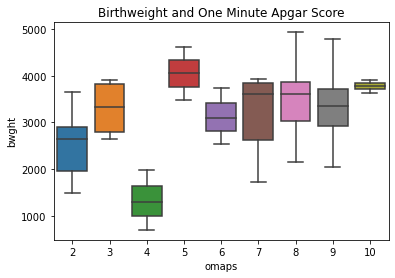

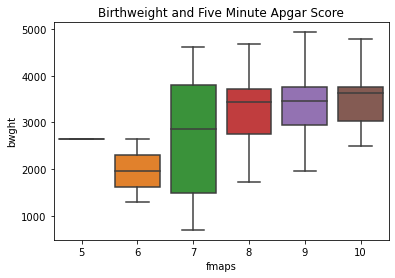

In [147]:
#rendering boxplot for omaps and fmaps
sns.boxplot(data = birthweight,
           x = 'omaps',
           y= 'bwght')
plt.title('Birthweight and One Minute Apgar Score')
plt.show()

#rendering boxplot for omaps and fmaps
sns.boxplot(data = birthweight,
           x = 'fmaps',
           y= 'bwght')
plt.title('Birthweight and Five Minute Apgar Score')
plt.show()

one minute apgar score, does show that newborns with a hight score, have a relative healthy birthweight, however, it also shows newborns with hight  birthweight with a lower score. A five minute apgar socre shows babies that have higher score with a higher weight, and lower score with a lower weight. Perhaps, five minute apgar score provides clearer results compare to a one minute apgar score

###### Maternal Age

 Let's take a look at the data distribution.

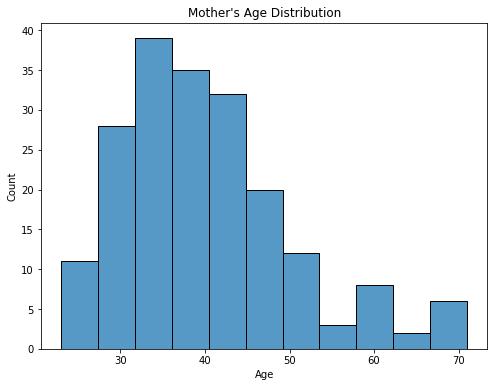

In [148]:
#checking the distribution o for mothers age
# rendering the plot
fig, ax = plt.subplots(figsize = (8, 6))
plt.title("Mother's Age Distribution")
plt.xlabel("Age")
plt.show(sns.histplot(data=birthweight, x= 'mage'))

Mother's age (mage) range, from 23 to 71 years old. On average, mother's age is 40 years old, with a standard deviation of 10 years. The data represents a wide rage for maternal ages. Advanced maternal age - mother being aged 35 years or above at the time of birth - is associated with increased risks such as low birth weight and preterm delivery. As mentioned before, data shows the average maternal age is 40, the data represents mothers above the treshold for increased pregnacy risks.

In [149]:
#Checking the  data percentage of mother over and under 35
under_35 =birthweight["mage"]<=35
over_35 = birthweight["mage"]>=36
print(f"""

Maternal Age Under 35

{round(under_35.value_counts()/len(birthweight["mage"])*100,0)}


Maternal Age Over 35

{round(over_35.value_counts()/len(birthweight["mage"])*100,0)}


""")




Maternal Age Under 35

False    63.0
True     37.0
Name: mage, dtype: float64


Maternal Age Over 35

True     63.0
False    37.0
Name: mage, dtype: float64





The data sample is 37% of mothers age under 35 years old, and 63% for maternal age over 35 years.

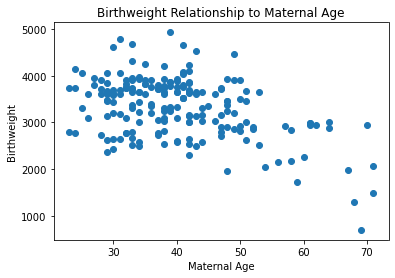

In [150]:
# Analysing relationship between birthweight and maternal age
#birthweight relationship to maternal age
plt.scatter(data=birthweight,
            x = "mage",
            y = "bwght",
           )
#customizing plot
plt.xlabel("Maternal Age")
plt.ylabel("Birthweight")
plt.title("Birthweight Relationship to Maternal Age")

#rendering plot
plt.show()

The results of the scatter plot do resemble a linear relationship between mother's age and birthweight, where as mother age increases, birthweight decreases. However, there are several aspects of this relationship that do not coincide with a linear pattern. 

##### Maternal Education

 Mother's Education (meduc): maternal educaton ranges from 8 - 17 years of education, with an average of 13.9 years of education. 

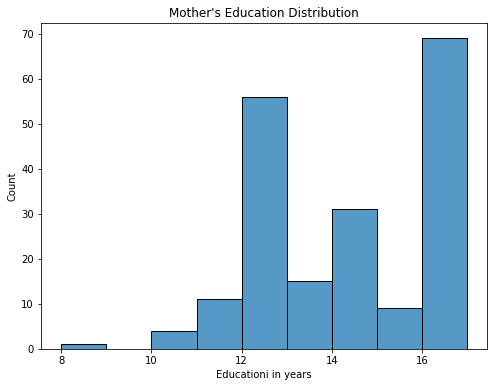

In [151]:
#checking the distribution o for mothers eduction
# rendering the plot
fig, ax = plt.subplots(figsize = (8, 6))
plt.title("Mother's Education Distribution")
plt.xlabel("Educationi in years")
plt.show(sns.histplot(data=birthweight, x= 'meduc'))

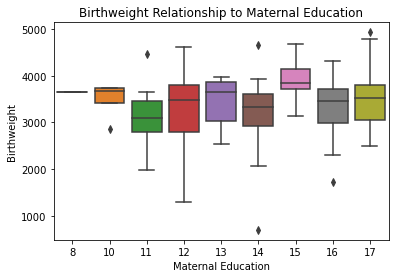

In [152]:
# Analysing relationship between birthweight and maternal education

#birthweight relationship to maternal age
sns.boxplot(data=birthweight,
            x = "meduc",
            y = "bwght",
           )
#customizing plot
plt.xlabel("Maternal Education")
plt.ylabel("Birthweight")
plt.title("Birthweight Relationship to Maternal Education")

#rendering plot
plt.show()

There is not a clear relationship between mother years of education and and birtweigth.

###### Mother's Race

In [153]:
#Variables Value Count and Percentages for mwhte,  and mblck
print(f"""
Mother is White
----------
{birthweight['mwhte'].value_counts()}

Mother is White %
-----------
{round(birthweight['mwhte'].value_counts()/len(birthweight)*100,0)}

Mother is Black 
-------------
{birthweight['mblck'].value_counts()}

Mother is Black %
-----------
{round(birthweight['mblck'].value_counts()/len(birthweight)*100,0)}
""")


Mother is White
----------
0    143
1     53
Name: mwhte, dtype: int64

Mother is White %
-----------
0    73.0
1    27.0
Name: mwhte, dtype: float64

Mother is Black 
-------------
0    121
1     75
Name: mblck, dtype: int64

Mother is Black %
-----------
0    62.0
1    38.0
Name: mblck, dtype: float64



The data sample is made up 38 % mother who are black and 52% white

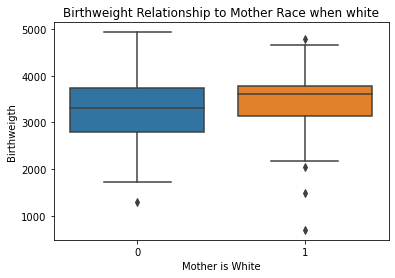

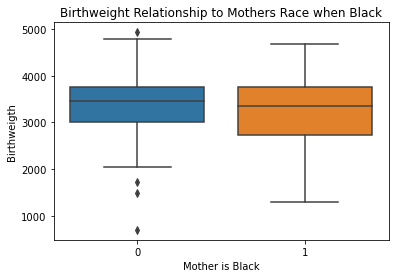

In [154]:
#displaying birthweigth against mother's race
sns.boxplot(data= birthweight,
            x= 'mblck',
            y= 'bwght',)
# title and axis labels
plt.title(label   = "Birthweight Relationship to Mother Race when white")
plt.xlabel(xlabel = "Mother is White")  #avoiding using dataset labels
plt.ylabel(ylabel = "Birthweigth")

# displaying the histogram
plt.show()

sns.boxplot(data= birthweight,
            x= 'mwhte',
            y= 'bwght',)

# title and axis labels
plt.title(label   = "Birthweight Relationship to Mothers Race when Black")
plt.xlabel(xlabel = "Mother is Black")  #avoiding using dataset labels
plt.ylabel(ylabel = "Birthweigth")

# displaying the histogram
plt.show()

The boxplot shows that mother that are white have on average have slightly higher birtweigth compare to mothers that are black; however, still within the threshold of a healthy birthweight. 

##### Mother is other

In [155]:
#Variables Value Count and Percentages moth

print(f"""
Mother is other
------
{birthweight['moth'].value_counts()}

Mother is other %
-----------
{round(birthweight['moth'].value_counts()/len(birthweight)*100,0)}

""")


Mother is other
------
0    128
1     68
Name: moth, dtype: int64

Mother is other %
-----------
0    65.0
1    35.0
Name: moth, dtype: float64




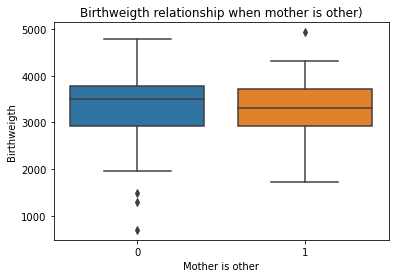

In [156]:
#displaying birthweigth when mother is other
sns.boxplot(data= birthweight,
            x= 'moth',
            y= 'bwght',)
# title and axis labels
plt.title(label   = "Birthweigth relationship when mother is other)")
plt.xlabel(xlabel = "Mother is other")  #avoiding using dataset labels
plt.ylabel(ylabel = "Birthweigth")

# displaying the histogram
plt.show()

When the mother is other the birthweight sligtly decreases however, still within the threshold of a healthy birthweight

##### Prenatal Care

Early and comprehensive prenatal care is a significant indicators birthweight. Mothers who do not receive adequate maternity care, double the risk of. Futher analyis will be done to understand how the data  between prenatal care and birthweight

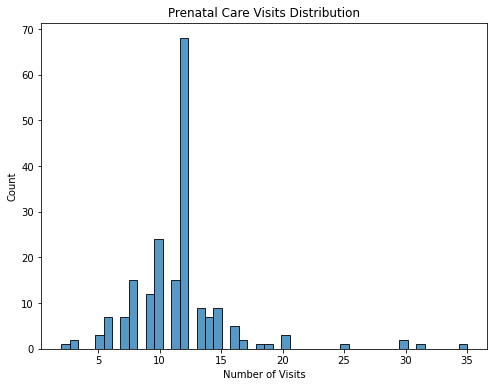

In [157]:
#checking the distribution o for number of prenatal care visist
# rendering the plot
fig, ax = plt.subplots(figsize = (8, 6))
plt.title("Prenatal Care Visits Distribution")
plt.xlabel("Number of Visits")
plt.show(sns.histplot(data=birthweight, x= 'npvis'))

The data sample, on average mothers start their prenatal care around the second month of their pregnacy. Prenatal care ranges from the 2 to 8 moths. According to the American Pregnancy Association, most women find out they're pregnant during their fourth to seventh week of pregnancy. In other words the data resembles the real world


The boxplot show that around 12 prenatal care visits the baby is around 3400 grams, and as the number of visits decreases, so those the birweight. this related to complication during the pregnacy that would warrant higher number of visits, conseqiely indicating that the birthweigh is also beign affected byt said complications. However is really unclear the median birthweight of the baby drops around 10 prenatal visits

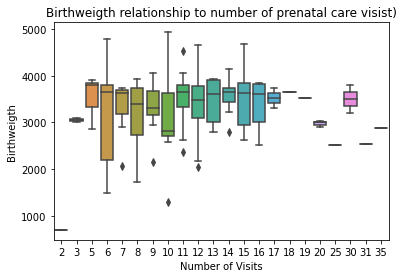

In [158]:
#Analysing relationship between birthweight and when the number of prenatal care visist
sns.boxplot(data= birthweight,
            x= 'npvis',
            y= 'bwght',)
# title and axis labels
plt.title(label   = "Birthweigth relationship to number of prenatal care visist)")
plt.xlabel(xlabel = "Number of Visits")  #avoiding using dataset labels
plt.ylabel(ylabel = "Birthweigth")

# displaying the histogram
plt.show()

Prenatal care visits does not have direct impact on birthweight. During prenatal care visits, doctors monitors the health of the baby and provide precautions and information about how to continue to care for the pregnacy - which in this case has a direct impact. The actions that mothers take based on prenatal care visits will give us more insights as to how prenatal care visits impact birthweight of the newborn

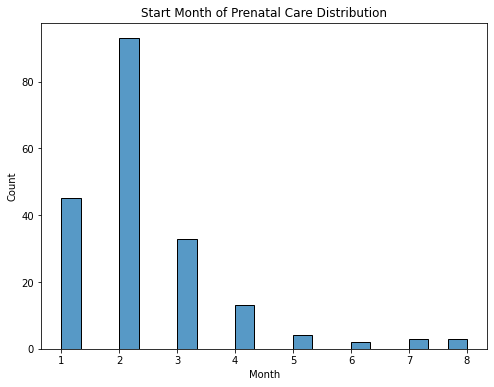

In [159]:
#checking the distribution o for start of prenatal care month
# rendering the plot
fig, ax = plt.subplots(figsize = (8, 6))
plt.title("Start Month of Prenatal Care Distribution")
plt.xlabel("Month")
plt.show(sns.histplot(data=birthweight, x= 'monpre'))

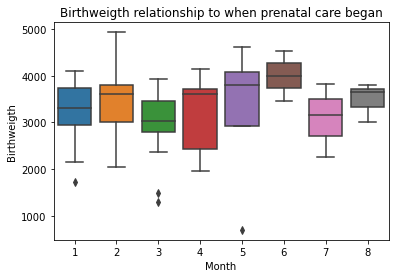

In [160]:
#Analysing relationship between birthweight and when the prenatal care began
sns.boxplot(data= birthweight,
            x= 'monpre',
            y= 'bwght',)
# title and axis labels
plt.title(label   = "Birthweigth relationship to when prenatal care began")
plt.xlabel(xlabel = "Month")  #avoiding using dataset labels
plt.ylabel(ylabel = "Birthweigth")

# displaying the histogram
plt.show()

The month prenatal care began doesn't show a clear relationship between when prenatal care started and birthweight. Mothers who started prenatal care earlier had newborns with a healthy birthweight. Mothers who started their prenatal care around the 6 month had the highest birthweight. However, mothers who began prenatal care in the 7th or 8th month. The relationship between when prenatal care began and birthweight is not clear. Perhaps more information about the mother prenatal care practices, medicine, etc. could help us birthweight the dynamic between these two variables.

### Fathers and the relationship with birthweight

##### Father's Age

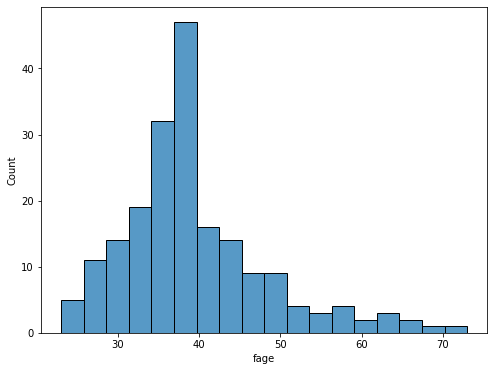

In [161]:
#checking the distribution of features related to the father age and education
# rendering the plot for father's age
fig, ax = plt.subplots(figsize = (8, 6))
plt.show(sns.histplot(data=birthweight, x= "fage"))


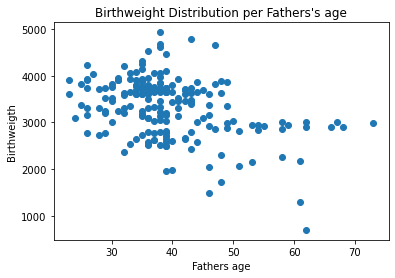

In [162]:
#displayin birthweight against variables relating to father age.
plt.scatter(data= birthweight,
            x= 'fage',
            y= 'bwght',)

# title and axis labels
plt.title(label   = "Birthweight Distribution per Fathers's age")
plt.xlabel(xlabel = "Fathers age")  #avoiding using dataset labels
plt.ylabel(ylabel = "Birthweigth")
# displaying the histogram
plt.show()


There is not a clear linear relationship between father and age, however as father's age increases, birthweigh decreases.

##### Father's Education

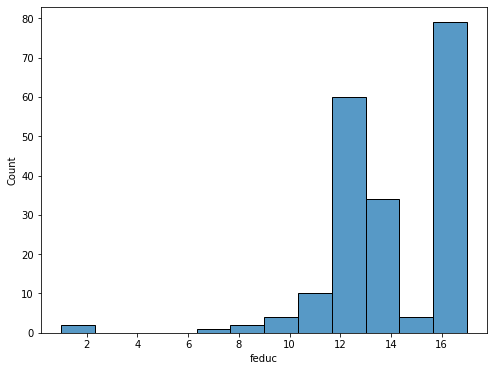

In [163]:
#checking the distribution of features related to the father education
# rendering the plot for father's educ
fig, ax = plt.subplots(figsize = (8, 6))
plt.show(sns.histplot(data=birthweight, x= "feduc"))

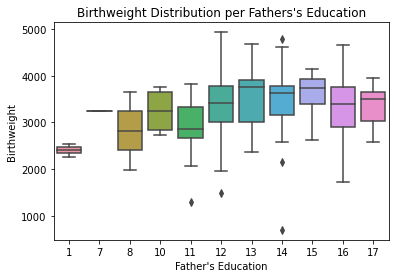

In [164]:
#displayin birthweight and father's age
sns.boxplot(data= birthweight,
            x= 'feduc',
            y= 'bwght',
            )
# title and axis labels
plt.title(label   = "Birthweight Distribution per Fathers's Education")
plt.xlabel(xlabel = "Father's Education") 
plt.ylabel(ylabel = "Birthweight")

# displaying the histogram
plt.show()


The boxplot shows that the more education the father has completed the birweight is increase.
Fathers that completed 1 years of educaiton have a lower birthhweight.

##### Father's Race

In [165]:
# printing columns percetages for fwhte, fblck, and foth
print(f"""
Father is White
----------
{birthweight['fwhte'].value_counts()} 

Father is White %
-----------
{round(birthweight['fwhte'].value_counts()/len(birthweight)*100,0)}

Father is Black
----------
{birthweight['fblck'].value_counts()} 

Father is Black %
-----------
{round(birthweight['fblck'].value_counts()/len(birthweight)*100,0)}

""")


Father is White
----------
0    128
1     68
Name: fwhte, dtype: int64 

Father is White %
-----------
0    65.0
1    35.0
Name: fwhte, dtype: float64

Father is Black
----------
0    129
1     67
Name: fblck, dtype: int64 

Father is Black %
-----------
0    66.0
1    34.0
Name: fblck, dtype: float64




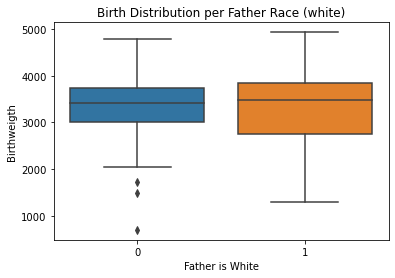

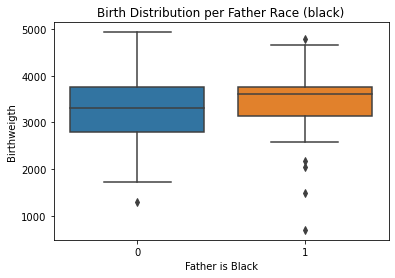

In [166]:
#displaying birthweigth against fathers's race
sns.boxplot(data= birthweight,
            x= 'fwhte',
            y= 'bwght',)
# title and axis labels
plt.title(label   = "Birth Distribution per Father Race (white)")
plt.xlabel(xlabel = "Father is White")  #avoiding using dataset labels
plt.ylabel(ylabel = "Birthweigth")

# displaying the histogram
plt.show()

sns.boxplot(data= birthweight,
            x= 'fblck',
            y= 'bwght',)

# title and axis labels
plt.title(label   = "Birth Distribution per Father Race (black)")
plt.xlabel(xlabel = "Father is Black")  #avoiding using dataset labels
plt.ylabel(ylabel = "Birthweigth")

# displaying the histogram
plt.show()

Fathers that are black  have a slightly higher birthweight, than those who are not.

##### Father is Other

In [167]:
# printing columns percetages for fwhte, fblck, and foth
print(f"""
Father is other
-------------
{birthweight['foth'].value_counts()}

Father is other %
-----------
{round(birthweight['foth'].value_counts()/len(birthweight)*100,0)}

""")


Father is other
-------------
0    135
1     61
Name: foth, dtype: int64

Father is other %
-----------
0    69.0
1    31.0
Name: foth, dtype: float64




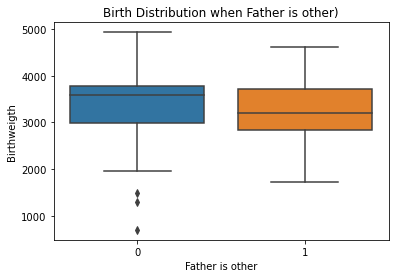

In [168]:
#displaying birthweigth against mother's race
sns.boxplot(data= birthweight,
            x= 'foth',
            y= 'bwght',)
# title and axis labels
plt.title(label   = "Birth Distribution when Father is other)")
plt.xlabel(xlabel = "Father is other")  #avoiding using dataset labels
plt.ylabel(ylabel = "Birthweigth")

# displaying the histogram
plt.show()

The boxplot show that when the father is other the birweight decreases

### Alcohol and Smoking Consumption

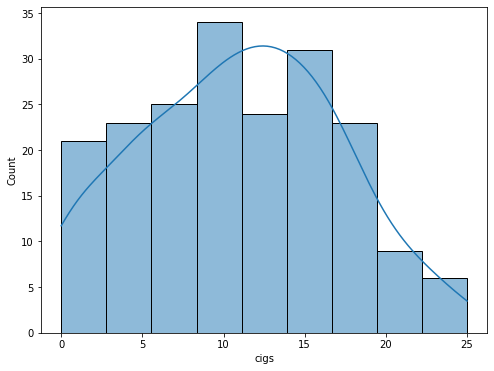

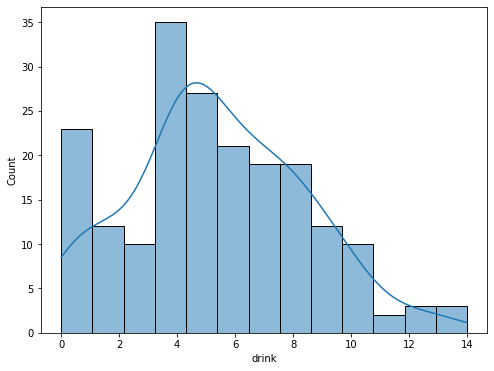

In [169]:
# rendering the histogram alchohol and cigarret comsumption
fig, ax = plt.subplots(figsize = (8, 6))
plt.show(sns.histplot(data=birthweight, x= 'cigs', kde = True))

fig, ax = plt.subplots(figsize = (8, 6))
plt.show(sns.histplot(data=birthweight, x= 'drink', kde = True))

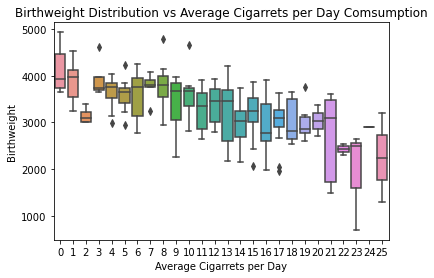

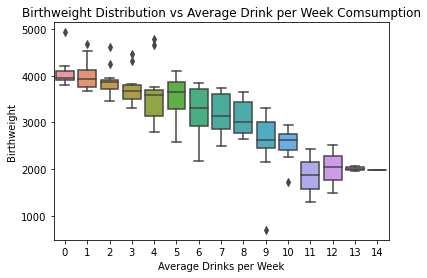

In [170]:
#rendering plot for cigs and alchohol comsumption
sns.boxplot(data=birthweight, x= 'cigs', y='bwght')
# title and axis labels
plt.title(label   = "Birthweight Distribution vs Average Cigarrets per Day Comsumption")
plt.xlabel(xlabel = "Average Cigarrets per Day") 
plt.ylabel(ylabel = "Birthweight")
# displaying the histogram
plt.show()

#rendering plot for drinks
sns.boxplot(data=birthweight, x= 'drink', y='bwght')
# title and axis labels
plt.title(label   = "Birthweight Distribution vs Average Drink per Week Comsumption")
plt.xlabel(xlabel = "Average Drinks per Week") 
plt.ylabel(ylabel = "Birthweight")
# displaying the histogram
plt.show()

There is a clear relationship between alchohol and smoking with low birthweight.

## Log Transformation

Log Transformation will makes skewed original data more normal. It improves the linearity between our dependent (bwtgh) and independent variables (mage). It wil boosts validity of our statistical analyses.

In [171]:
# log transforming mage and fage and saving it to the dataset
birthweight['log_mage'] = np.log(birthweight['mage'])
birthweight['log_fage'] = np.log(birthweight['fage'])

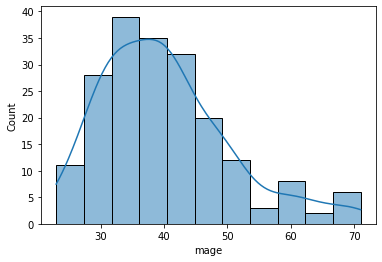

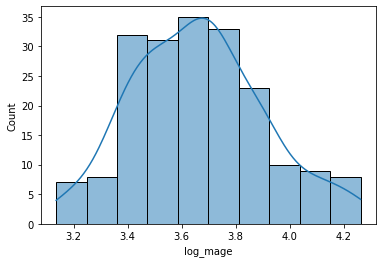

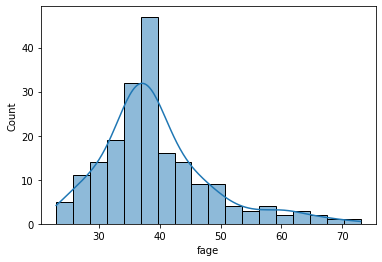

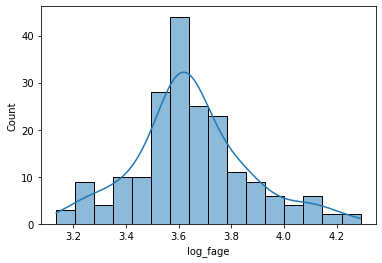

In [172]:
# comparing log transfomation distribution, histogram  
sns.histplot(data   = birthweight,
             x      = 'mage',
             kde    = True)


# rendering the plot
plt.show()

# histogram for log_mage
sns.histplot(data   = birthweight,
             x      = 'log_mage',
             kde    = True)


# rendering the plot
plt.show()

# histogram for fage 
sns.histplot(data   = birthweight,
             x      = 'fage',
             kde    = True)


# rendering the plot
plt.show()

# histogram for log_fage
sns.histplot(data   = birthweight,
             x      = 'log_fage',
             kde    = True)


# rendering the plot
plt.show()



## Regression OLS

##### Perason Correlation

In [173]:
# creating a (Pearson) correlation matrix
birthweight_corr = birthweight.corr(method = 'pearson').round(2)


# printing (Pearson) correlations with bwght
print(birthweight_corr.loc['bwght'].sort_values(ascending = False))


bwght       1.00
fmaps       0.25
omaps       0.25
feduc       0.13
mblck       0.13
fblck       0.12
male        0.11
meduc       0.09
npvis       0.06
m_npvis     0.06
m_feduc    -0.00
moth       -0.02
mv_sum     -0.03
fwhte      -0.04
monpre     -0.05
foth       -0.08
mwhte      -0.11
m_meduc    -0.13
log_fage   -0.38
fage       -0.40
log_mage   -0.42
mage       -0.46
cigs       -0.57
drink      -0.74
Name: bwght, dtype: float64


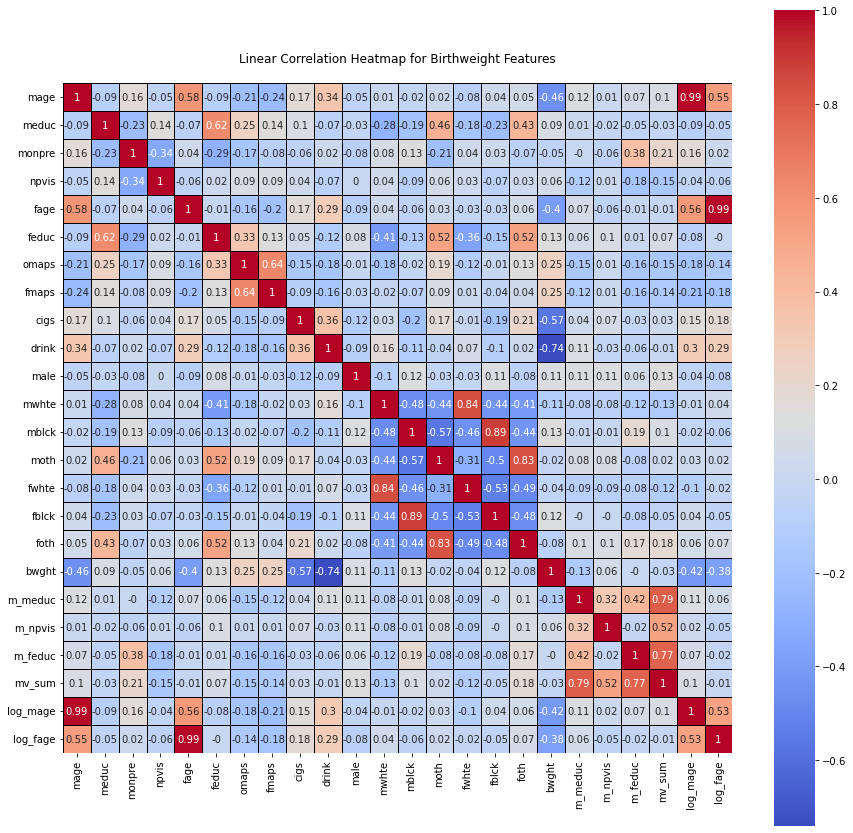

In [174]:
# specifying plot size (making it bigger)
fig, ax = plt.subplots(figsize=(15,15))


# developing a coolwarm heatmap
sns.heatmap(data       = birthweight_corr, # the correlation matrix
            cmap       = 'coolwarm',    # changing to MEDIUM colors
            square     = True,          # tightening the layout
            annot      = True,          # should there be numbers in the heatmap
            linecolor  = 'black',       # lines between boxes
            linewidths = 0.5)           # how thick should the lines be


# title and displaying the plot
plt.title("""
Linear Correlation Heatmap for Birthweight Features
""")

plt.show()

C:\Users\Gleid\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


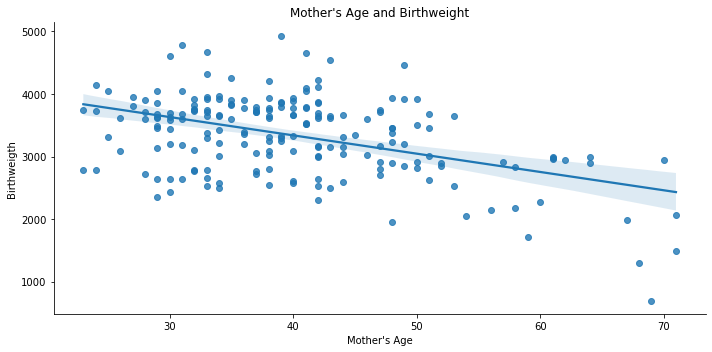

In [175]:
# instantiating a scatter plot for mage and bwght
sns.lmplot(x          = 'mage',  # x-axis feature
           y          = 'bwght',  # y-axis feature
           hue        = None,     # categorical data for subsets
           legend_out = False,    # formats legend if hue != None
           scatter    = True,     # renders a scatter plot
           fit_reg    = True,    # renders a regression line
           aspect     = 2,        # aspect ratio for plot
           data       = birthweight) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label    = "Mother's Age and Birthweight")
plt.xlabel(xlabel  = "Mother's Age")
plt.ylabel(ylabel  = 'Birthweigth')
# plt.xlim(20, 75)
plt.tight_layout()
plt.show()


C:\Users\Gleid\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


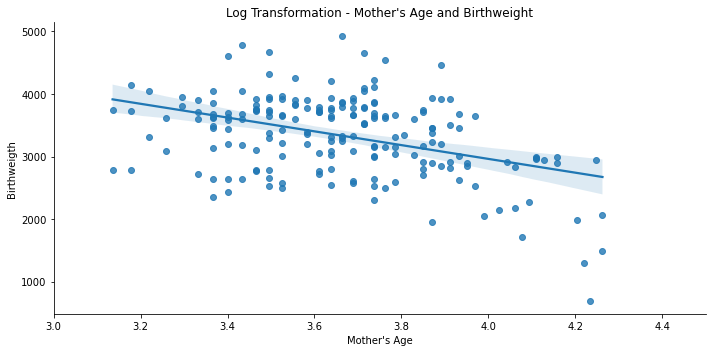

In [176]:
# instantiating a scatter plot for mage and bwght
sns.lmplot(x          = 'log_mage',  # x-axis feature
           y          = 'bwght',  # y-axis feature
           hue        = None,     # categorical data for subsets
           legend_out = False,    # formats legend if hue != None
           scatter    = True,     # renders a scatter plot
           fit_reg    = True,    # renders a regression line
           aspect     = 2,        # aspect ratio for plot
           data       = birthweight) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label    = "Log Transformation - Mother's Age and Birthweight")
plt.xlabel(xlabel  = "Mother's Age")
plt.ylabel(ylabel  = 'Birthweigth')
plt.xlim(3, 4.5)
plt.tight_layout()
plt.show()


##### Initial Thoughts

1. The linear trens seem to be consisten with lower age, howevent thre apppears to be a fannig out patter. This is indicative of a non linear relationship. 
2. Birthweight seems to decline after mother 40 years old
3. Some observation greatly stand out from the linear trend, towards 70 years old thic oculd be that our data does not have alog of mother over the age 50

Let's try applying log_mage and log_bwght to see if it follos a liner relationship

C:\Users\Gleid\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


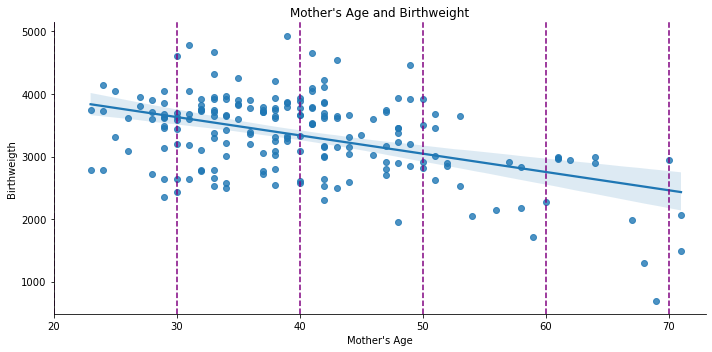

In [177]:
# instantiating an lmplot for mage and bwght
sns.lmplot(x          = 'mage',  # x-axis feature
           y          = 'bwght',  # y-axis feature
           hue        = None,     # categorical data for subsets
           legend_out = False,    # formats legend if hue != None
           scatter    = True,     # renders a scatter plot
           fit_reg    = True,    # renders a regression line
           aspect     = 2,        # aspect ratio for plot
           data       = birthweight) # DataFrame where features exist


# looping over the x-range to save time
value = 20

while value < 73:
    
    # making a vertical line
    plt.axvline(x = value, color = "purple", linestyle = '--')
    
    # incrementing value in one-quarter increments
    value += 10


# formatting and displaying the plot
plt.title(label    = "Mother's Age and Birthweight")
plt.xlabel(xlabel  = "Mother's Age")
plt.ylabel(ylabel  = 'Birthweigth')
plt.xlim(20, 73)
plt.tight_layout()
plt.show()

C:\Users\Gleid\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


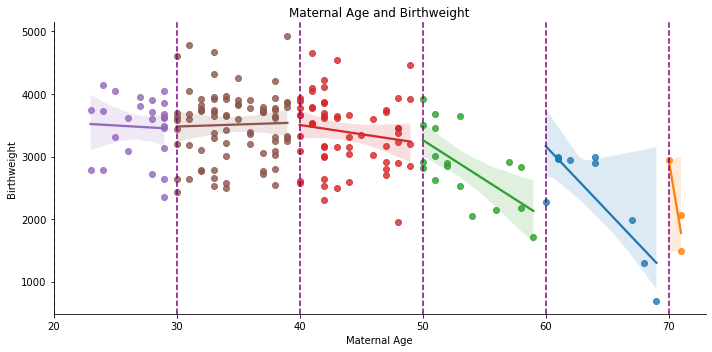

In [178]:
# creating a dummy column in the diamonds DataFrame
birthweight['Age size'] = 0


# for loop with iterrows() <-- one of the most useful methods for DataFrames
for index, col in birthweight.iterrows():
    
    
    # conditionals to change the values in the new column
    if birthweight.loc[index, 'mage'] < 30:
        birthweight.loc[index, 'Age size'] = '[20, 30)'
        
        
    elif birthweight.loc[index, 'mage'] < 40:
        birthweight.loc[index, 'Age size'] = '[30 - 40)'
        
        
    elif birthweight.loc[index, 'mage'] < 50:
        birthweight.loc[index, 'Age size'] = '[40 - 50)'
        
        
    elif birthweight.loc[index, 'mage'] < 60:
        birthweight.loc[index, 'Age size'] = '[50 - 50)'
        
    elif birthweight.loc[index, 'mage'] >= 70:
        birthweight.loc[index, 'Age size'] = '[70 - inf)'
    
    
    # safety net
    else:
        birthweight.loc[index, 'Age size'] = 'error'


# instantiating an lmplot for mage and bwght
sns.lmplot(x          = 'mage',  
           y          = 'bwght',  
           hue        = 'Age size', # categorical data for subsets
           legend     = False,        # supressing the legend
           legend_out = False,    
           scatter    = True,     
           fit_reg    = True,     
           aspect     = 2,        
           data       = birthweight)


# looping over the x-range to save time
value = 0

while value < 73:
    
    # making a vertical line
    plt.axvline(x = value, color = "purple", linestyle = '--')
    
    # incrementing value in 10 years increments
    value += 10


# formatting and displaying the plot
plt.title(label    = "Maternal Age and Birthweight")
plt.xlabel(xlabel  = 'Maternal Age')
plt.ylabel(ylabel  = 'Birthweight')
plt.xlim(20, 73)
plt.tight_layout()
plt.show()


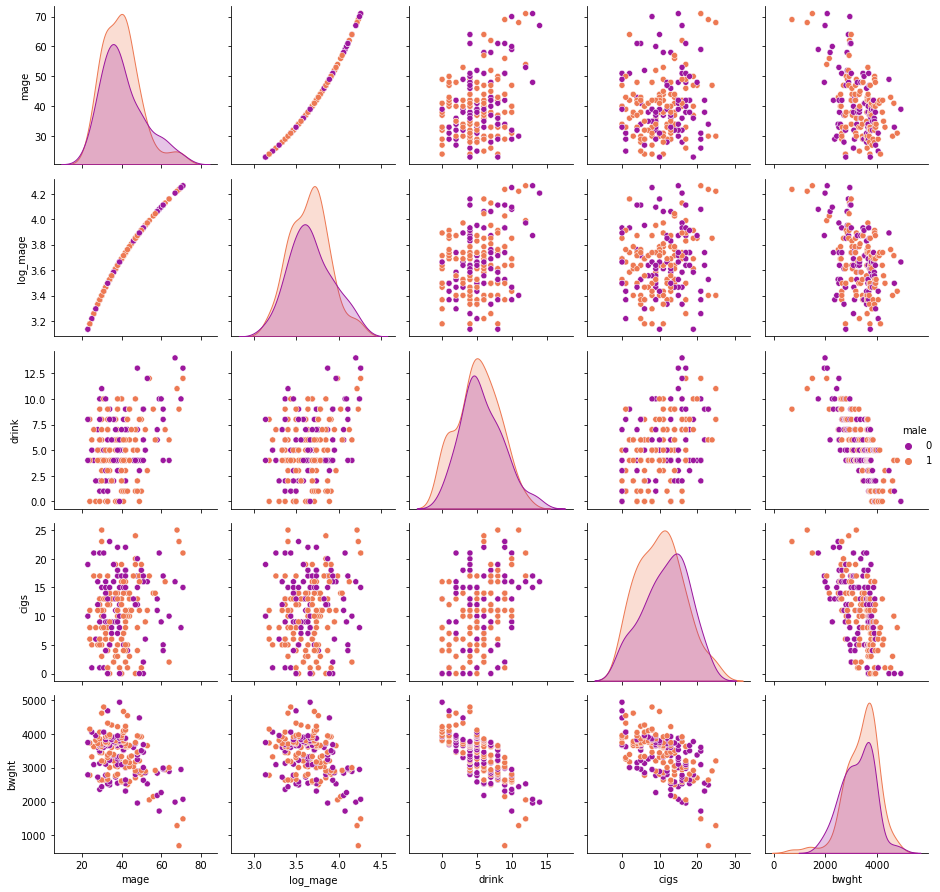

In [179]:
# palplot for all numeric features
sns.pairplot(data = birthweight,
             x_vars = ['mage', 'log_mage', 'drink', 'cigs', 'bwght'],
             y_vars = ['mage', 'log_mage', 'drink', 'cigs', 'bwght'],
             hue = 'male',
             kind = 'scatter',
             palette = 'plasma')


# formatting options and display
plt.tight_layout()
plt.show()

In [251]:
#Creating new dataset and dropping unwated variables
birthweight_new  = birthweight.drop(['m_npvis','m_feduc','m_meduc','mv_sum','Age size', 'log_fage', 'fmaps', 'omaps'],
                                axis = 1)

### Base Model

Base models is developed using a minimal set of highly-correlated features from the original dataset based on pearson correlation and quality of linear relationship.This will also simplify the interpretation of model results.

In [252]:
#INSTANTIATE a model object
lm_base = smf.ols(formula = """bwght ~ mage +
drink+
cigs 
                                    """,
                  data   = birthweight_new)


# Step 2: FIT the data into the model object
results = lm_base.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     152.7
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           1.31e-50
Time:                        23:07:45   Log-Likelihood:                -1426.6
No. Observations:                 196   AIC:                             2861.
Df Residuals:                     192   BIC:                             2874.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4928.7856    106.672     46.205      0.0

### Best  OLS Model

In [263]:
#INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ log_mage +
                                       drink +
                                       cigs 
                                        """,
                  data    = birthweight_new)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     145.9
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           2.78e-49
Time:                        23:24:27   Log-Likelihood:                -1429.7
No. Observations:                 196   AIC:                             2867.
Df Residuals:                     192   BIC:                             2880.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6270.6416    394.420     15.898      0.0

In [270]:
#dynamic printing with log_mage coefficient interpretation
print(f"""
The log_mage coefficient has been interpreted as follows: 
{-514.7490/100} grams
""")


The log_mage coefficient has been interpreted as follows: 
-5.14749 grams



The coefficient for bwght can be interpreted as follows:


- For every one unit increase in mother's age, we expect an decrease in birthweight
of approximately 5.15 grams, all else equal.

- For every one unit increase in drink, we expect an decrease in birthweight
of approximately 121.2 grams, all else equal.

- For every one unit increase in cigs, we expect an decrease in birthweight
of approximately 36.3 grams, all else equal.


This expectation is based on a confidence interval, as can be observed from the '0.025' and '0.975' columns. Thus, our interpretation of mother's age, drink, and cigs's effect on birthweight can be expanded as follows:

- For every one unit increase in age, we expect an decrease in
birthweight between 3 grams and 7.33 grams a. Overall, we expect such decrease
to converge on a value of 5.14 grams, all else equal.

- For every one unit increase in drink, we expect an decrease in
birthweight between 102.4 grams and 140 grams a. Overall, we expect such decrease
to converge on a value of 121.2 grams, all else equal.

- For every one unit increase in cigs, we expect a decrease in
birthweight between 27.40 grams and 45.25 grams a. Overall, we expect such decrease
to converge on a value of 36.3 grams, all else equal.

In [233]:
# declaring set of x-variables
x_variables = ['log_mage', 'cigs','drink']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

log_mage +
cigs +
drink +


### Training and Testing

In [234]:
#preparing explanatory variable data
birthweight_data   = birthweight_new.drop(['bwght'],
                                axis = 1)


# preparing response variables
birthweight_target = birthweight_new.loc[ : , 'bwght']



# preparing training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")



Training Data
-------------
X-side: (147, 16)
y-side: (147,)


Testing Data
------------
X-side: (49, 16)
y-side: (49,)



In [235]:
# applying model in scikit-learn

# preparing x-variables from the OLS model
ols_data = birthweight_new.loc[:,x_variables]


# preparing response variable
birthweight_target = birthweight_new.loc[:, 'bwght']


#saved for futher analysis with lasso model
###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [236]:
### INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)

# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square
lr_train_score = lr.score(x_train_OLS, y_train_OLS)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6999
OLS Testing Score  : 0.6459
OLS Train-Test Gap : 0.054


In [237]:
# zipping each feature name to its coefficient
lr_model_values = zip(birthweight_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 6881.3)
('log_mage', -681.67)
('cigs', -38.21)
('drink', -113.5)


## Lasso Regression odel

In [238]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

Lasso Training Score : 0.7293
Lasso Testing Score  : 0.6185
Lasso Train-Test Gap : 0.054


In [239]:
## This code may have to be run more than once ##
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3806.84)
('mage', -13.82)
('meduc', 15.03)
('npvis', 1.47)
('fage', -3.06)
('feduc', 16.43)
('fmaps', 80.96)
('cigs', -37.12)
('drink', -100.41)
('male', 43.26)
('moth', -78.74)


## ARD Model

In [240]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train, y_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test)


print('Training Score:', ard_model.score(x_train, y_train).round(4))
print('Testing Score :', ard_model.score(x_test, y_test).round(4))

# saving scoring data for future use
ard_train_score = ard_model.score(x_train, y_train).round(4)
ard_test_score  = ard_model.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7427
Testing Score : 0.6421
ARD Train-Test Gap : 0.1006


In [242]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthweight_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -667.1)
('mage', -62.66656)
('meduc', 17.48314)
('monpre', 0.0001)
('npvis', 0.0012)
('fage', -0.00144)
('feduc', 13.07188)
('cigs', -38.63217)
('drink', -100.09144)
('male', 0.00292)
('mwhte', 0.00102)
('mblck', 1e-05)
('moth', -74.22691)
('fwhte', 0.00038)
('fblck', 8e-05)
('foth', -0.00069)
('log_mage', 1939.92539)


In [256]:
# comparing results

print(f"""
Model      Train Score          
-----      -----------          
Best OLS        {(lr_train_score).round(4)}                
Lasso      {lasso_train_score}                                  
ARD  {ard_train_score}                                 
            __________
            Test Score
            ---------- 
Best OLS        {(lr_test_score).round(4)}
Lasso      {lasso_test_score}
ARD  {ard_test_score} 
            _________
            Test Gap
            ---------
Best OLS   {lr_test_gap}
Lasso      {lasso_test_gap}
ARD        {ard_test_gap}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_performance/linear_model_performance.xlsx',
                           index = False)


Model      Train Score          
-----      -----------          
Best OLS        0.6999                
Lasso      0.7293                                  
ARD  0.7427                                 
            __________
            Test Score
            ---------- 
Best OLS        0.6459
Lasso      0.6185
ARD  0.6421 
            _________
            Test Gap
            ---------
Best OLS   0.054
Lasso      0.054
ARD        0.1006


